# Aim & Objective 

- The primary aim of this data analysis project is to gain comprehensive insights from a hotel booking dataset to inform data-driven decisions, enhance guest experiences, and optimize business operations in the hospitality industry.

# About the Data

We have a dataset with various columns that contain information about the customers and their hotel bookings as listed below:

- Customer_id: An integer identifier for customers.
- Market_segment: The market segment designation of the customer, such as 'Online TA' (Travel Agents).
- Distribution_channel: The distribution channel used for booking.
- Is_repeated_guest: Binary (0 or 1) indicating whether the guest is a repeated guest.
- Previous_cancellations: The number of previous cancellations by the customer.
- Previous_bookings_not_canceled: The number of previous bookings that were not canceled by the customer.
- Reserved_room_type: The code for the type of room reserved.
- Assigned_room_type: The code for the type of room assigned to the customer.
- Booking_changes: The number of changes or amendments made to the booking.
- Deposit_type: The type of deposit made for the reservation.
- Agent: The ID of the travel agent or agency making the booking.
- Company: The ID of the company or entity making the booking.
- Days_in_waiting_list: The number of days the booking was in the waiting list before being confirmed.
- Customer_type: The type of customer, such as 'Transient' or 'Contract.'
- ADR: The average daily rate, a numerical value.
- Required_car_parking_spaces: The number of car parking spaces required by the customer.
- Total_of_special_requests: The total number of special requests made by the customer.
- Reservation_status: The reservation status (e.g., 'Check-Out').
- Is_cancelled: Binary (0 or 1) indicating whether the booking was canceled.
- Lead_time: The number of days between booking and arrival.
- Arrival_date_year: The year of arrival.
- Arrival_date_month: The month of arrival.
- Arrival_date_week_number: The week number of arrival.
- Arrival_date_day_of_month: The day of the month of arrival.
- Stays_in_weekend_nights: The number of weekend nights (Saturday or Sunday) the customer stayed.
- Stays_in_week_nights: The number of weeknights (Monday to Friday) the customer stayed.
- Adults: The number of adults in the booking.
- Children: The number of children in the booking.
- Babies: The number of babies in the booking.
- Meal: The type of meal booked (e.g., 'BB' for Bed & Breakfast).
- Country: The country of origin of the customer.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

# Preparing the dataset

Pulling data from HDFS

In [2]:
spark = SparkSession.builder.appName('cc_proj').getOrCreate()
df1 = spark.read.csv('hdfs://namenode/customer_bookings_data.csv', header = True, inferSchema = True)
df2 = spark.read.csv('hdfs://namenode/hotel_bookings_data.csv', header = True, inferSchema = True)

In [3]:
df1.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: integer (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: integer (nullable = true)
 |-- company: integer (nullable = true)
 |-- days_in_waiting_list: integer (nullable = true)
 |-- customer_type: string (nullable = true)
 |-- adr: double (nullable = true)
 |-- required_car_parking_spaces: integer (nullable = true)
 |-- total_of_special_requests: integer (nullable = true)
 |-- reservation_status: string (nullable = true)



In [4]:
df2.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- is_cancelled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: integer (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)



In [5]:
# Left Joining the two dataframes
df = df1.join(df2, on="customer_id", how="left")

In [6]:
df.count()

119390

In [7]:
len(df.columns)

31

In [8]:
df.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: integer (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: integer (nullable = true)
 |-- company: integer (nullable = true)
 |-- days_in_waiting_list: integer (nullable = true)
 |-- customer_type: string (nullable = true)
 |-- adr: double (nullable = true)
 |-- required_car_parking_spaces: integer (nullable = true)
 |-- total_of_special_requests: integer (nullable = true)
 |-- reservation_status: string (nullable = true)
 |-- is_cancelled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: int

In [9]:
pd.set_option('display.max_columns', None)

# Set max_colwidth to None to display full column content without truncation
pd.set_option('display.max_colwidth', None)

# Pre-Processing

In [10]:
# Convert the Spark DataFrame to a Pandas DataFrame

pandas_df = df.toPandas()

## Handling Missing Values

In [11]:
# Check for null values in each column and sum them up
null_counts = pandas_df.isnull().sum()

# Print the count of null values for each column
print(null_counts)

customer_id                            0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
is_cancelled                           0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend

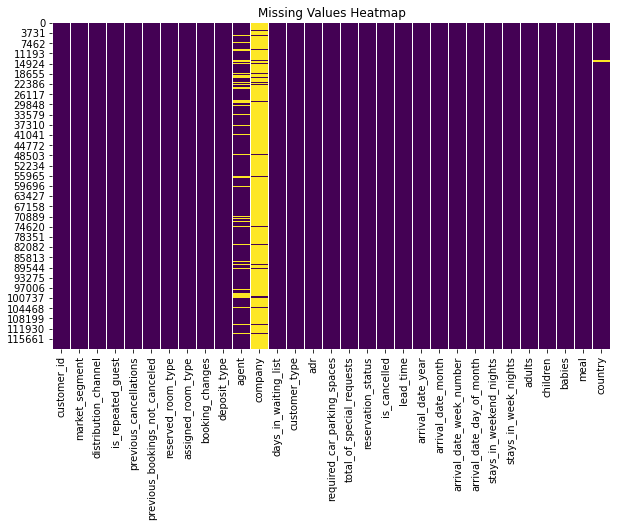

In [12]:
# Visualizing null values
# Using Seaborn to create a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(pandas_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Due to the number of null values being high in the 'country' and 'agent' features and the feature 'country' not being of much use I am going to drop those columns.

In [13]:
columns_to_drop = ['country', 'agent', 'company']
pandas_df = pandas_df.drop(columns=columns_to_drop)

In [14]:
pandas_df.head()

,customer_id,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal
0,227886,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,0,342,2015,July,27,1,0,0,2,0.0,0,BB
1,188129,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,0,737,2015,July,27,1,0,0,2,0.0,0,BB
2,152912,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,0,7,2015,July,27,1,0,1,1,0.0,0,BB
3,310783,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,0,13,2015,July,27,1,0,1,1,0.0,0,BB
4,850598,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,0,14,2015,July,27,1,0,2,2,0.0,0,BB


### For further data quality I will drop the 4 rows in 'children' column havin null values

In [15]:
pandas_df = pandas_df.dropna(subset=["children"])

In [16]:
pandas_df.count()

customer_id                       119386
market_segment                    119386
distribution_channel              119386
is_repeated_guest                 119386
previous_cancellations            119386
previous_bookings_not_canceled    119386
reserved_room_type                119386
assigned_room_type                119386
booking_changes                   119386
deposit_type                      119386
days_in_waiting_list              119386
customer_type                     119386
adr                               119386
required_car_parking_spaces       119386
total_of_special_requests         119386
reservation_status                119386
is_cancelled                      119386
lead_time                         119386
arrival_date_year                 119386
arrival_date_month                119386
arrival_date_week_number          119386
arrival_date_day_of_month         119386
stays_in_weekend_nights           119386
stays_in_week_nights              119386
adults          

In [17]:
len(pandas_df.columns)

28

In [18]:
# Checking for null values again
null_counts_ = pandas_df.isnull().sum()
print(null_counts_)

customer_id                       0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_cancelled                      0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                        

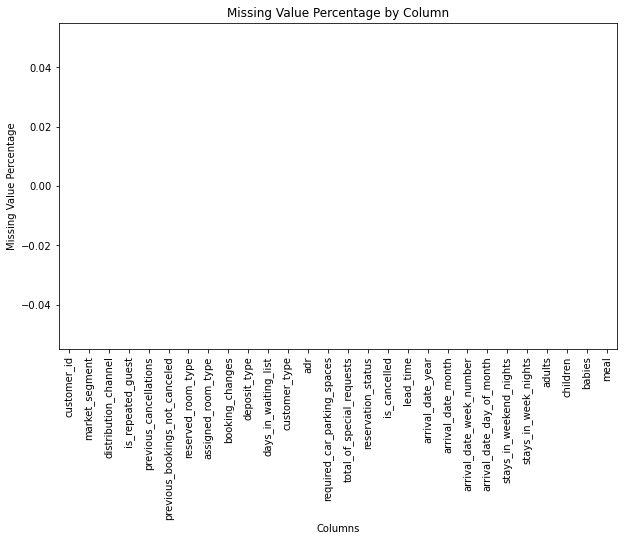

In [19]:
# Again visualising null values with percentage

# Calculate the percentage of missing values for each column
missing_percentage = (pandas_df.isnull().sum() / len(pandas_df)) * 100

# Create a bar plot to visualize missing value percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage')
plt.title('Missing Value Percentage by Column')
plt.show()

### As we can see there is no missing data now

## Checking for Duplicate Records

In [20]:
# Check for duplicate records in the entire DataFrame
duplicate_records = pandas_df.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_records.sum()

# Display the number of duplicate records
print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [21]:
pandas_df.shape

(119386, 28)

## Outlier Detection

Plotting histograms of all features **BEFORE** outlier detection after dropping 'customer_id' as it is a non-informative (not meaningful) feature and it would only add noise to the visualization.

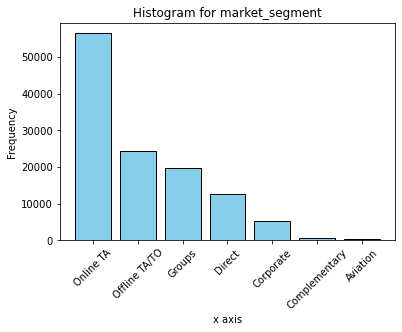

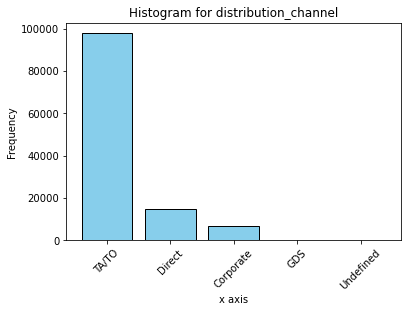

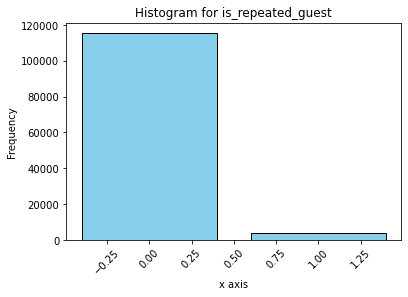

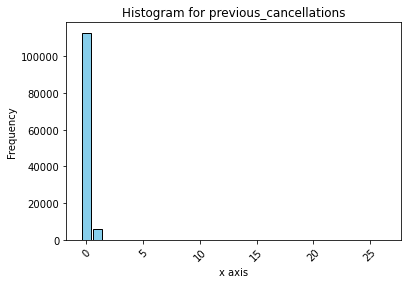

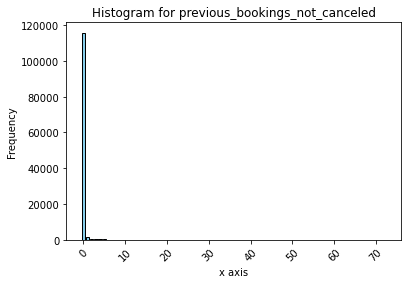

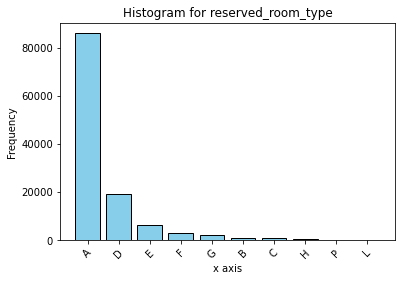

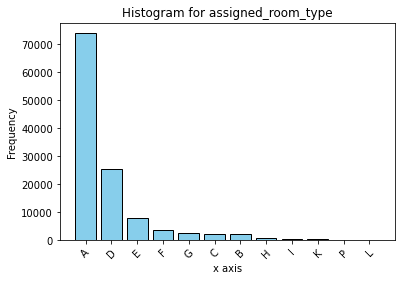

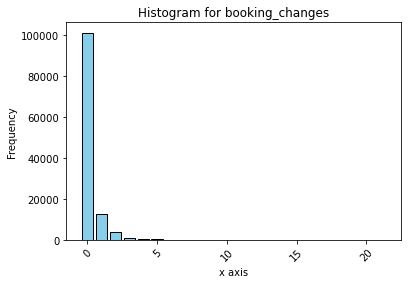

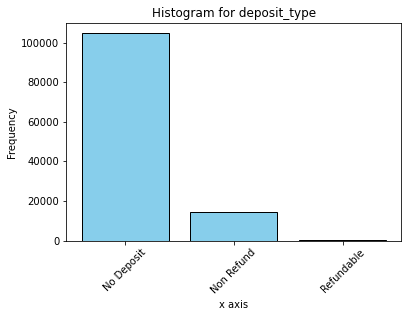

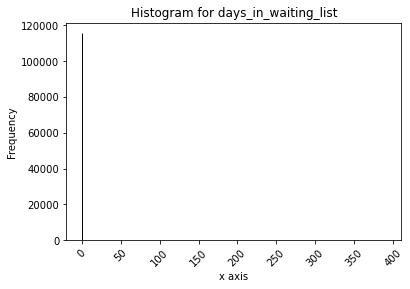

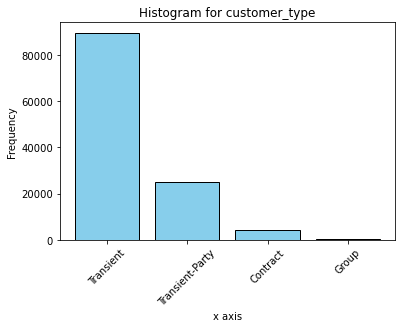

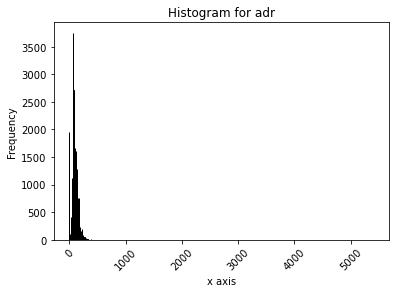

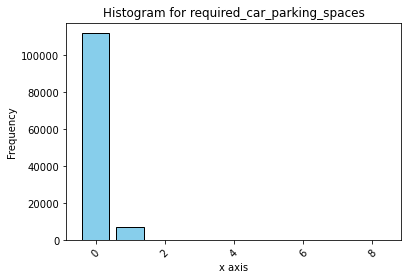

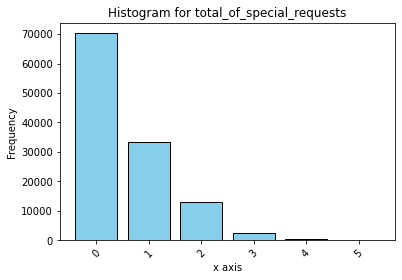

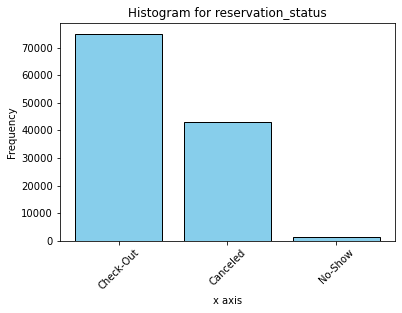

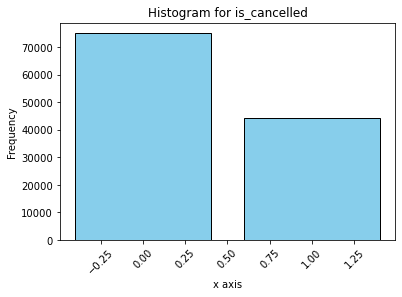

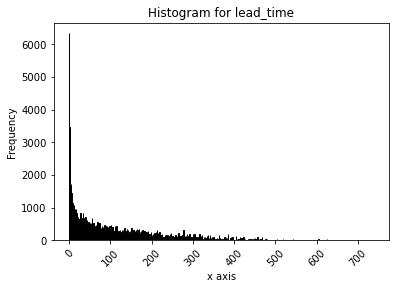

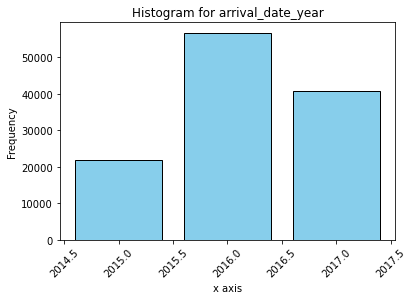

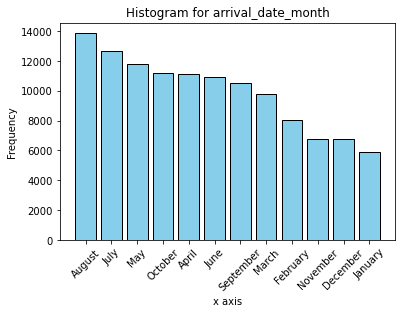

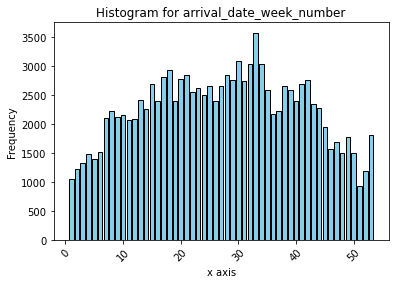

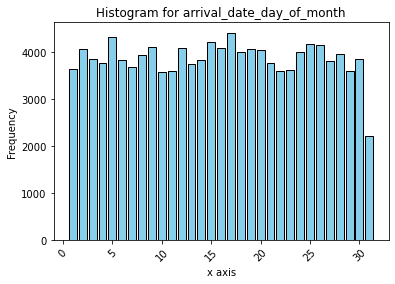

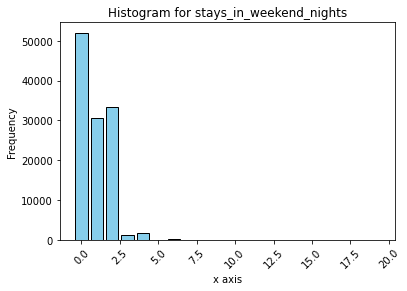

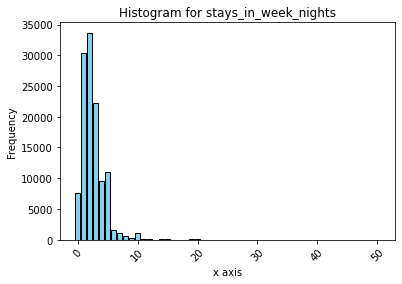

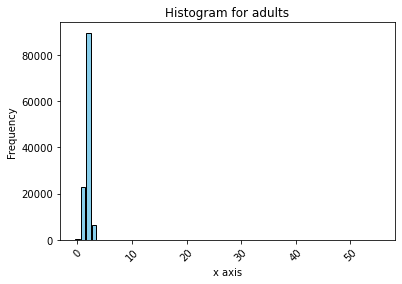

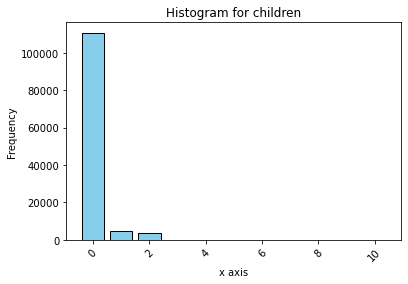

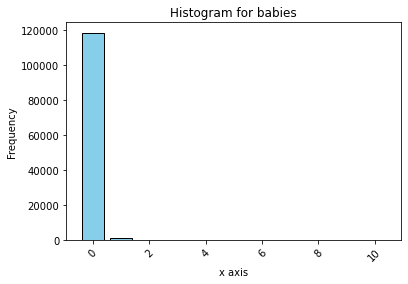

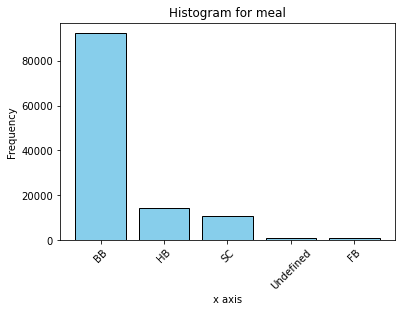

In [22]:
no_id_pandas_df = pandas_df.drop(columns=['customer_id'])

# Creating histograms for each column
for column in no_id_pandas_df.columns:
    value_counts = no_id_pandas_df[column].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.xlabel('x axis')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.xticks(rotation=45)
    plt.show()

- Note: We are performing Z-score based outlier detection only for numerical features, because if we wanted to perform outlier detection for categorical features too, it would have have increased the number of features to 71 which would have swindled us into the curse of dimensionality, which in turn allows us to target the most relevant aspects of our data while avoiding potential issues associated with high-dimensional data.

In [23]:
from scipy import stats

# Defining a z-score threshold for outlier detection
z_threshold = 3

# Identifying numerical columns
numerical_columns = pandas_df.select_dtypes(include=['number']).columns

# Remove outliers in numerical columns
df_no_outliers = pandas_df[(np.abs(stats.zscore(pandas_df[numerical_columns])) < z_threshold).all(axis=1)]

df_no_outliers

,customer_id,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_cancelled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal
2,152912,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,0,7,2015,July,27,1,0,1,1,0.0,0,BB
3,310783,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,0,13,2015,July,27,1,0,1,1,0.0,0,BB
4,850598,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,0,14,2015,July,27,1,0,2,2,0.0,0,BB
5,774118,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,0,14,2015,July,27,1,0,2,2,0.0,0,BB
6,357935,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,0,0,2015,July,27,1,0,2,2,0.0,0,BB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,429949,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,2,Check-Out,0,21,2017,August,35,30,2,5,2,0.0,0,BB
119385,558479,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,0,23,2017,August,35,30,2,5,2,0.0,0,BB
119386,817651,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,0,102,2017,August,35,31,2,5,3,0.0,0,BB
119388,710700,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,0,109,2017,August,35,31,2,5,2,0.0,0,BB


Plotting histograms of all features **AFTER** outlier detection after dropping 'customer_id' as it is a non-informative (not meaningful) feature and it would only add noise to the visualization.

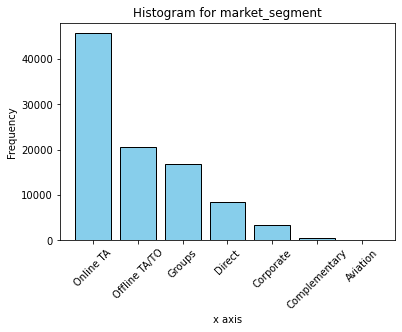

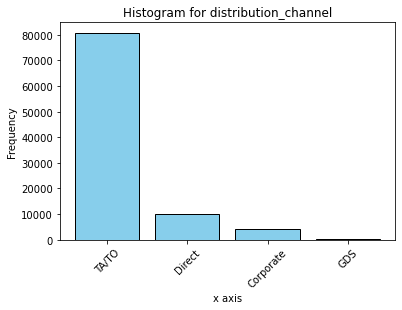

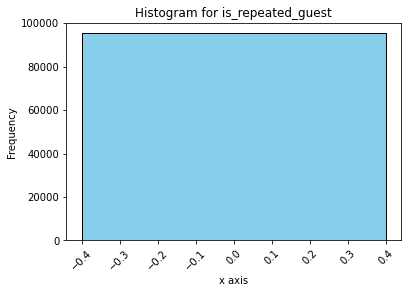

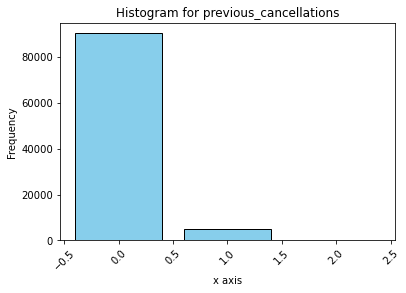

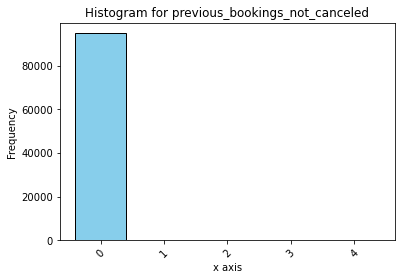

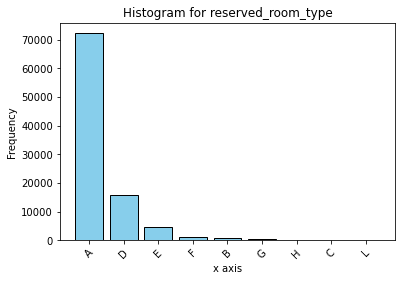

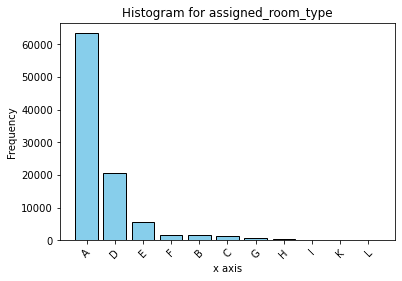

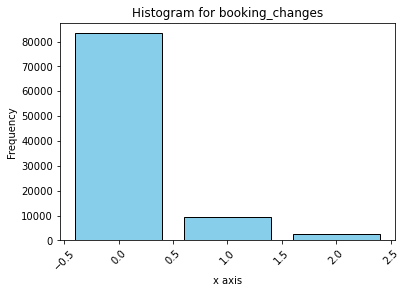

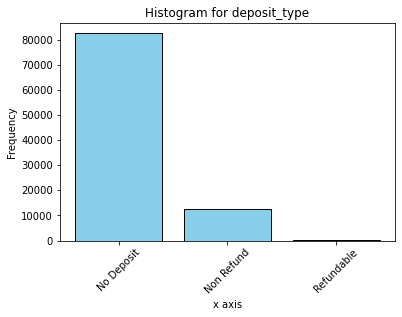

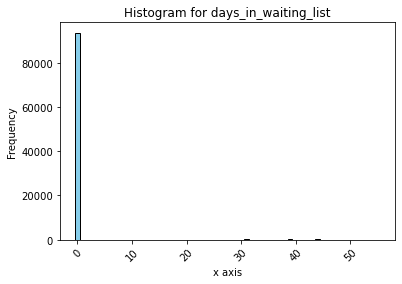

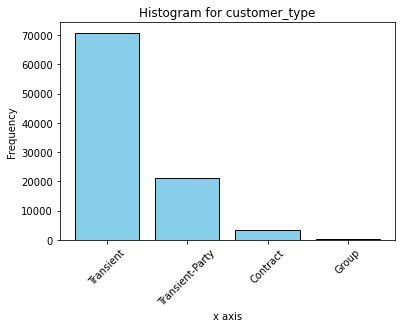

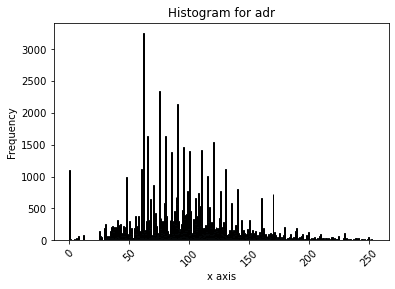

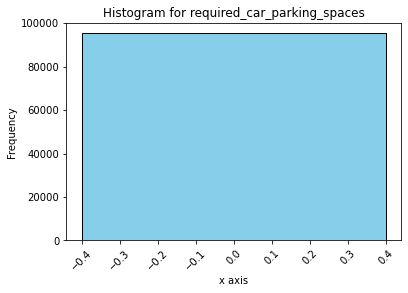

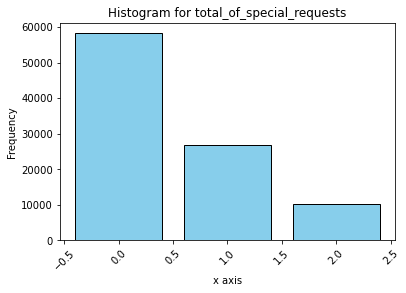

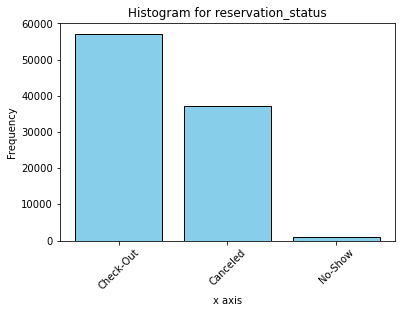

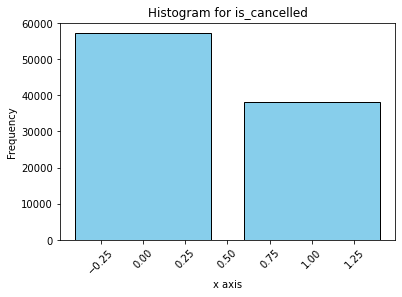

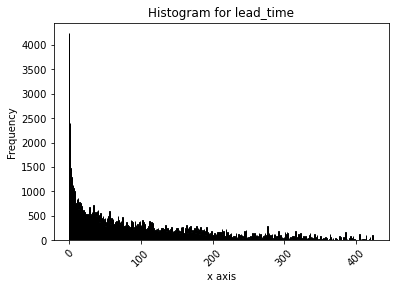

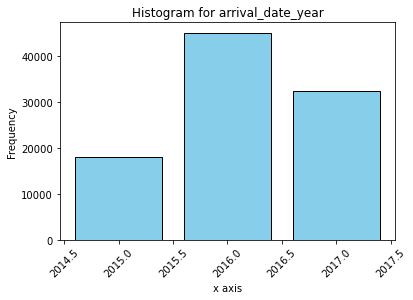

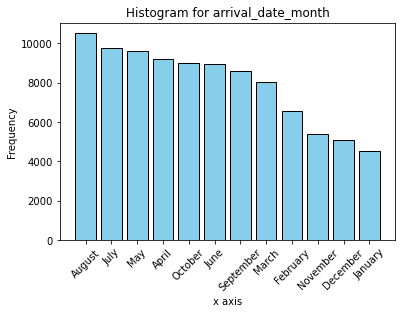

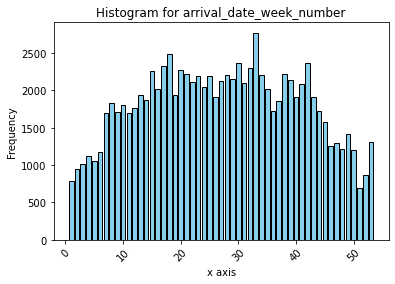

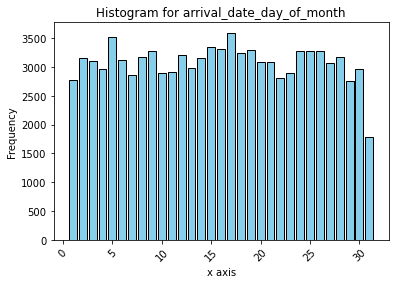

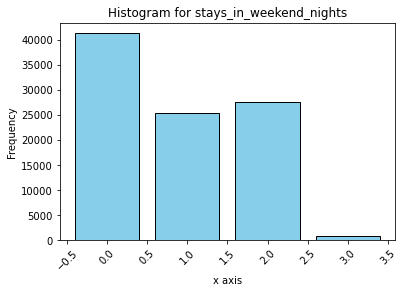

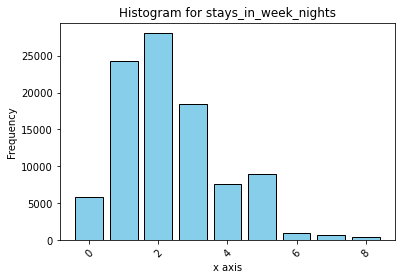

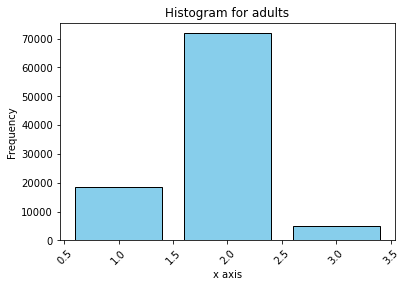

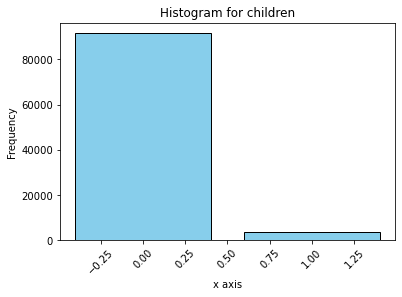

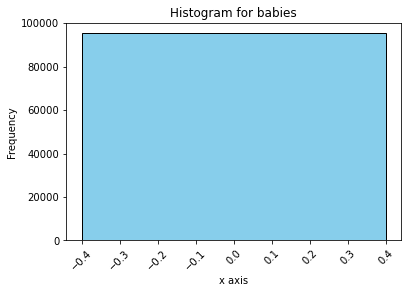

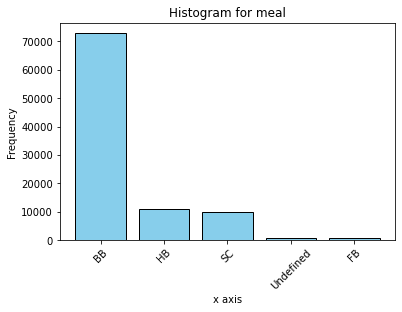

In [24]:
no_id_wo_outliers = df_no_outliers.drop(columns=['customer_id'])

# Creating histograms for each column
for column in no_id_pandas_df.columns:
    value_counts = no_id_wo_outliers[column].value_counts()
    plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.xlabel('x axis')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.xticks(rotation=45)
    plt.show()

In [25]:
df_no_outliers.shape

(95322, 28)

In [26]:
df_no_outliers.columns

Index(['customer_id', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_cancelled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal'],
      dtype='object')

# EDA

## What is the distribution of the Average Daily Rate (ADR), and how does it vary with different market segments?

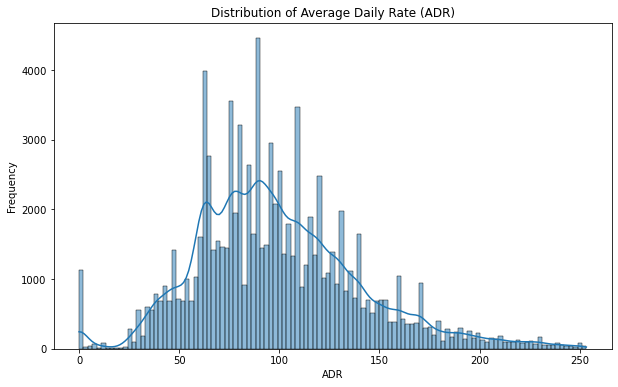

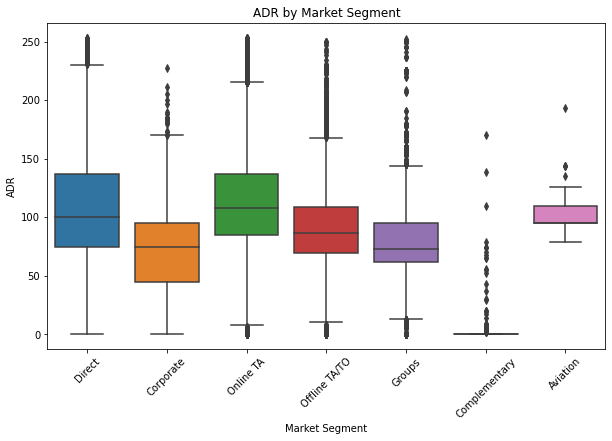

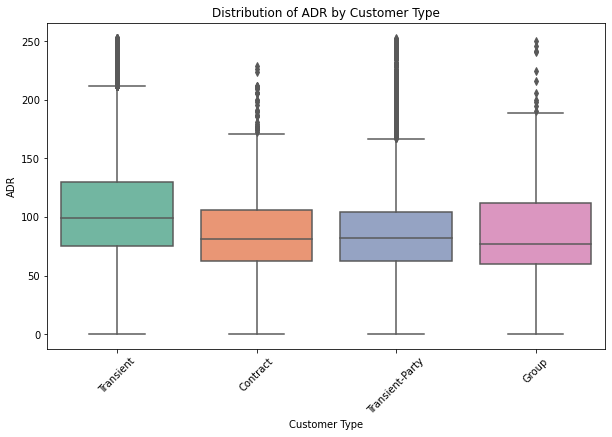

In [27]:
# Visualizing ADR distribution through a histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_outliers, x='adr', kde=True)
plt.title("Distribution of Average Daily Rate (ADR)")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()

# Visualizing ADR by market segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='market_segment', y='adr')
plt.title("ADR by Market Segment")
plt.xticks(rotation=45)
plt.xlabel("Market Segment")
plt.ylabel("ADR")
plt.show()

# Visualizing ADR by customer type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='customer_type', y='adr', palette='Set2')
plt.title('Distribution of ADR by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.show()

## How do various features relate to booking cancellations?

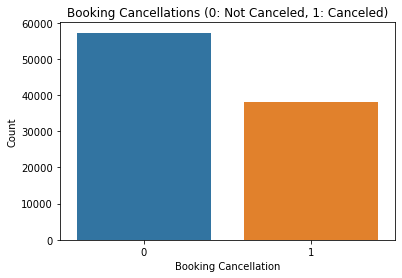

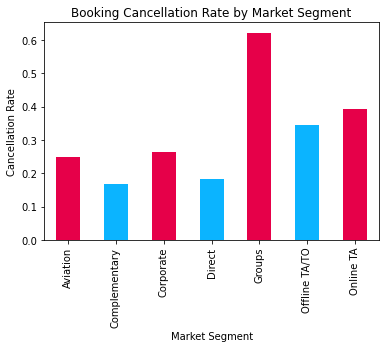

In [28]:
# Countplot of booking cancellations
sns.countplot(data=df_no_outliers, x='is_cancelled')
plt.title("Booking Cancellations (0: Not Canceled, 1: Canceled)")
plt.xlabel("Booking Cancellation")
plt.ylabel("Count")
plt.show()

# Bar plot of cancellation rates by market segment
cancel_rate_by_segment = df_no_outliers.groupby('market_segment')['is_cancelled'].mean()
cancel_rate_by_segment.plot(kind='bar', color = ["#e60049", "#0bb4ff"])
plt.title("Booking Cancellation Rate by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.show()


## Can we identify distinct customer segments based on their behavior?

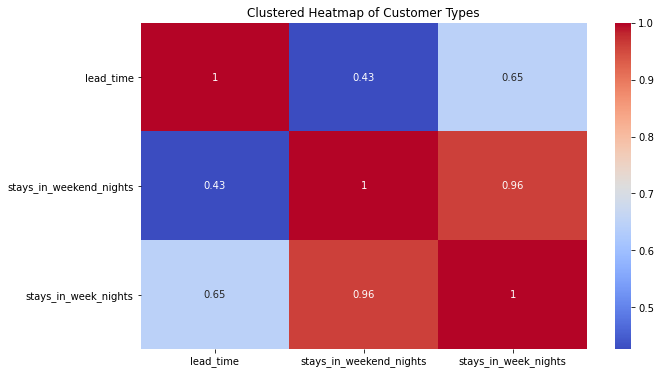

In [29]:
# Grouping similar customer types based on booking and stay behavior
customer_type_grouped = df_no_outliers.groupby('customer_type').agg({
    'lead_time': 'mean',
    'stays_in_weekend_nights': 'mean',
    'stays_in_week_nights': 'mean'
}).reset_index()

# Creating a clustered heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(customer_type_grouped.corr(), annot=True, cmap='coolwarm')
plt.title('Clustered Heatmap of Customer Types')
plt.show()

## What patterns can be observed among various booking features, and how do these patterns provide insights into guest behavior and preferences?

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<ipython-input-30-2085358d985e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


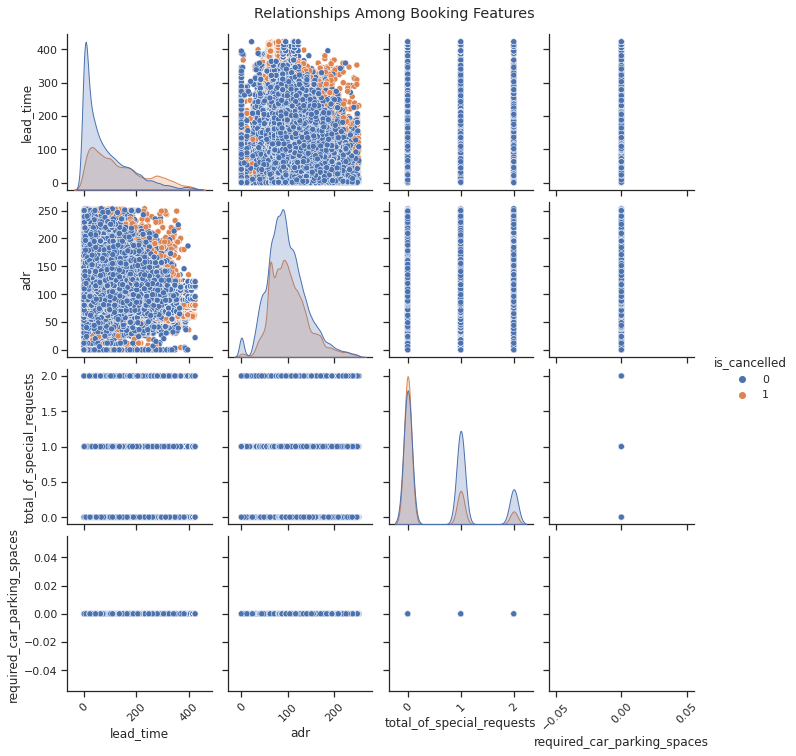

In [30]:
# Defining the features for the pairplot
booking_features = df_no_outliers[['lead_time', 'adr', 'total_of_special_requests', 'required_car_parking_spaces', 'is_cancelled']]

# Creating a pairplot to visualize relationships between booking features
sns.set(style="ticks")
pairplot = sns.pairplot(booking_features, hue='is_cancelled', diag_kind='kde')

# Rotate x-axis labels
for ax in pairplot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.suptitle("Relationships Among Booking Features", y=1.02)
plt.show()

## Correlation Matrix

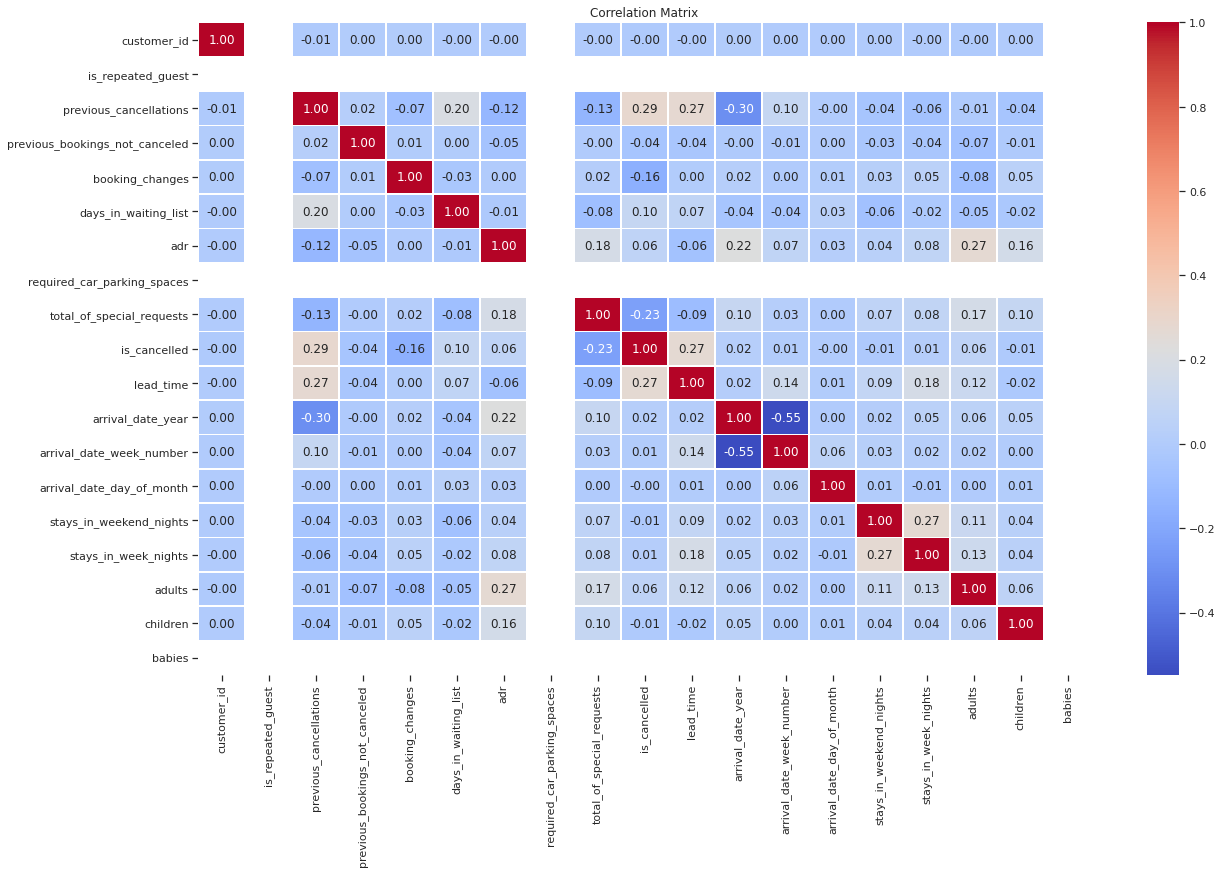

In [31]:
# Select the numeric columns from your DataFrame
numeric_columns = df_no_outliers.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot (optional)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Modeling

In [32]:
# Converting the pre-processed pandas dataframe to a spark dataframe

spark_df = spark.createDataFrame(df_no_outliers)

## Classification using Random Forest algorithm

### Predicting whether a booking will be cancelled or not

AUC-ROC: 0.7695224444721296
AUC-PR: 0.7197156969750524
Recall: 0.7695224444721293


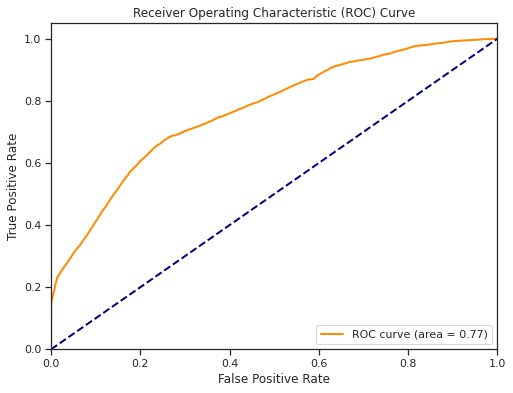

In [33]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a copy of the Spark DataFrame
spark_rf1 = spark_df.alias("new_df")

# Split the data into training and testing sets
(train_data, test_data) = spark_rf1.randomSplit([0.8, 0.2], seed=123)

# Define the feature columns and the target column
feature_columns = ['customer_id', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'lead_time']
target_column = 'is_cancelled'

# Prepare the features using VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Create and train a Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol=target_column, numTrees=100)
pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train_data)

# Make predictions on the testing set
predictions = model.transform(test_data)

# Cast label column to DoubleType
predictions = predictions.withColumn(target_column, col(target_column).cast('double'))

# Evaluate the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol=target_column, rawPredictionCol="rawPrediction")
roc_auc = evaluator.evaluate(predictions)

# Calculate and print other evaluation metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

print(f"AUC-ROC: {roc_auc}")
print(f"AUC-PR: {precision}")
print(f"Recall: {recall}")

# Get the ROC curve
y_true = [int(row[target_column]) for row in predictions.select(target_column).collect()]
y_prob = [row["probability"][1] for row in predictions.select("probability").collect()]

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Extracting feature importances

In [34]:
# Get the Random Forest model from the pipeline
rf_model = model.stages[-1]  # The Random Forest model is the last stage in the pipeline

# Extract the feature importances
importances = rf_model.featureImportances

# Get the input feature names from the VectorAssembler
input_features = [colname for colname in model.stages[0].getInputCols()]

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': input_features, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)


                          Feature  Importance
8                       lead_time    0.306885
2          previous_cancellations    0.303999
7       total_of_special_requests    0.248592
4                 booking_changes    0.109493
5            days_in_waiting_list    0.016443
3  previous_bookings_not_canceled    0.014228
0                     customer_id    0.000360
1               is_repeated_guest    0.000000
6     required_car_parking_spaces    0.000000


- Here we can see that 'is_repeated_guest' & 'required_car_parking_spaces' features are not important, so we will not select them in our feature_columns for classification.

AUC-ROC: 0.7723815467882302
AUC-PR: 0.7224499021381895
Recall: 0.7723815467882297


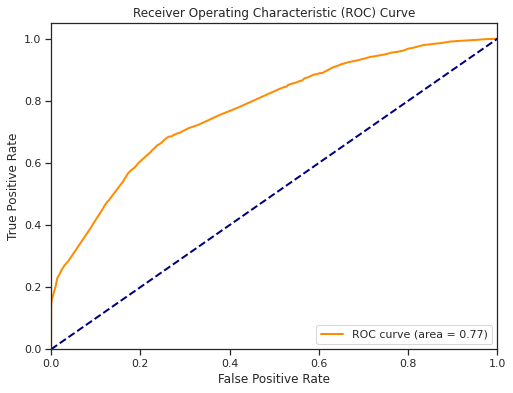

In [35]:
# Create a copy of the Spark DataFrame
spark_rf2 = spark_df.alias("new_df")

# Split the data into training and testing sets
(train_data, test_data) = spark_rf2.randomSplit([0.8, 0.2], seed=123)

# Define the feature columns and the target column
feature_columns = ['customer_id', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests', 'lead_time']

# Prepare the features using VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Create and train a Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol=target_column, numTrees=100)
pipeline = Pipeline(stages=[assembler, rf])
model = pipeline.fit(train_data)

# Make predictions on the testing set
predictions = model.transform(test_data)

# Cast label column to DoubleType
predictions = predictions.withColumn(target_column, col(target_column).cast('double'))

# Evaluate the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol=target_column, rawPredictionCol="rawPrediction")
roc_auc = evaluator.evaluate(predictions)

# Calculate and print other evaluation metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

print(f"AUC-ROC: {roc_auc}")
print(f"AUC-PR: {precision}")
print(f"Recall: {recall}")

# Get the ROC curve
y_true = [int(row[target_column]) for row in predictions.select(target_column).collect()]
y_prob = [row["probability"][1] for row in predictions.select("probability").collect()]

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


- Note: The AUC-ROC value improved only a tiny bit from 0.7715904870112701 to 0.7730848950859154.

## Regression using Linear Regression

### Predict the Average Daily Rate (ADR) of hotel bookings

In [36]:
spark_df.describe

<bound method DataFrame.describe of DataFrame[customer_id: bigint, market_segment: string, distribution_channel: string, is_repeated_guest: bigint, previous_cancellations: bigint, previous_bookings_not_canceled: bigint, reserved_room_type: string, assigned_room_type: string, booking_changes: bigint, deposit_type: string, days_in_waiting_list: bigint, customer_type: string, adr: double, required_car_parking_spaces: bigint, total_of_special_requests: bigint, reservation_status: string, is_cancelled: bigint, lead_time: bigint, arrival_date_year: bigint, arrival_date_month: string, arrival_date_week_number: bigint, arrival_date_day_of_month: bigint, stays_in_weekend_nights: bigint, stays_in_week_nights: bigint, adults: bigint, children: double, babies: bigint, meal: string]>

Root Mean Squared Error (RMSE): 36.94435538762094
R-squared (R2): 0.2079893359498719
Mean Absolute Error (MAE): 28.060702466012046


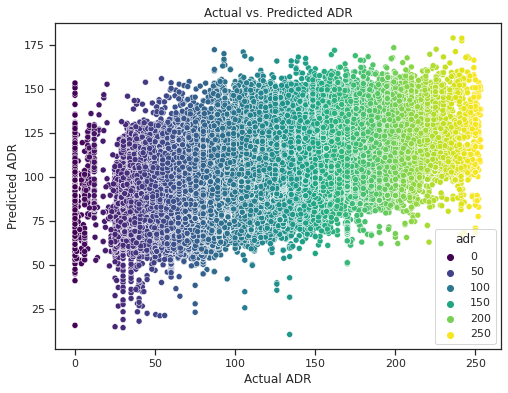

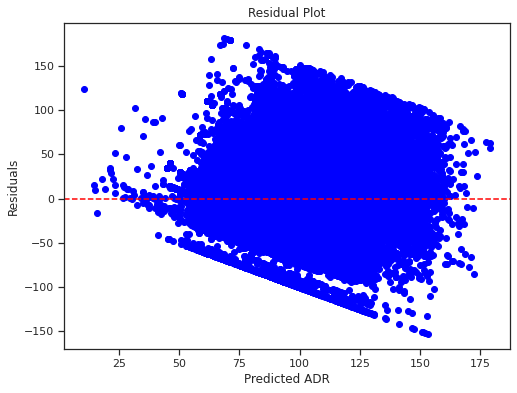

In [37]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a copy of the Spark DataFrame
spark_lr = spark_df.alias("new_df")

# Define the feature columns and the target column
feature_columns = [
    'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces',
    'total_of_special_requests', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies'
]
target_column = 'adr'  # The target column we want to predict

# Prepare the features using VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Apply one-hot encoding to categorical columns if needed
# For example, for 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', and 'meal'

# Create and apply a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol=target_column)
pipeline = Pipeline(stages=[assembler, lr])
model = pipeline.fit(spark_lr)

# Make predictions on the dataset
predictions = model.transform(spark_lr)

# Evaluate the model using RegressionEvaluator
evaluator = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Additional evaluation metrics can be added
# For example, 'r2' (R-squared) and 'mae' (Mean Absolute Error)
evaluator.setMetricName("r2")
r2 = evaluator.evaluate(predictions)
print(f"R-squared (R2): {r2}")

evaluator.setMetricName("mae")
mae = evaluator.evaluate(predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the actual vs. predicted values
actual_values = predictions.select(target_column).toPandas()
predicted_values = predictions.select("prediction").toPandas()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=actual_values[target_column], y=predicted_values["prediction"], hue=actual_values[target_column], palette="viridis")
plt.xlabel("Actual ADR")
plt.ylabel("Predicted ADR")
plt.title("Actual vs. Predicted ADR")
plt.show()

# Calculate residuals (actual - predicted)
residuals = actual_values[target_column] - predicted_values["prediction"]

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values["prediction"], residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted ADR")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Clustering using K-Means Algorithm

### Identifying the most profitable clients in our data set based on lead time and ADR

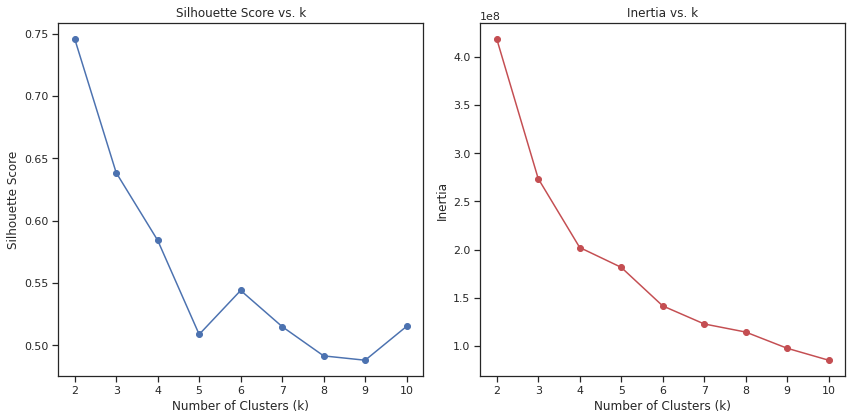

In [38]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Create a copy of the Spark DataFrame
spark_kmc = spark_df.alias("new_df")

# Prepare the features for clustering
feature_columns = ['lead_time', 'adr']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(spark_kmc)

# Train the K-Means model with different values of 'k' (number of clusters) and evaluate the results. 
# We will evaluate the model based on the silhouette score and the sum of squared distances (inertia) for each 'k' value.

silhouette_scores = []
inertia = []
ks = range(2, 11)
for k in ks:
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(data)
    predictions = model.transform(data)

    # Evaluate the clustering using the Silhouette Score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)

    # Inertia is the sum of squared distances to the nearest cluster center
    inertia.append(model.summary.trainingCost)

# Plot the Silhouette Score and Inertia to choose the optimal number of clusters ('k')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ks, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')

plt.subplot(1, 2, 2)
plt.plot(ks, inertia, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. k')
plt.tight_layout()
plt.show()


- Note: We will choose k=4 as silhouette score is still quite high ( ~ 0.58) at k=4 and inertia is starting to level-off too (as k=4 is the elbow of the 'inertia vs k' graph).

Silhouette Score: 0.5841073625316864
Cluster Centers:
Cluster 0: [32.69339353 73.90263307]
Cluster 1: [153.10911244 101.73263978]
Cluster 2: [300.24326511  85.55721382]
Cluster 3: [ 40.34252874 150.93218241]


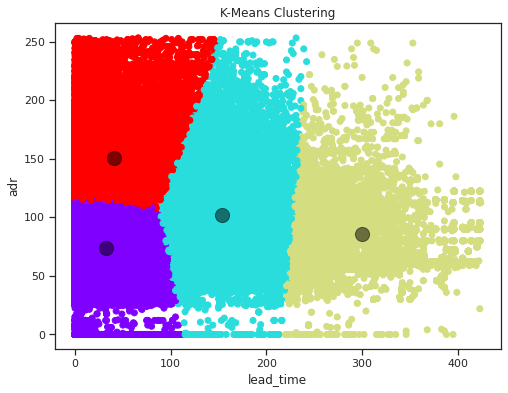

In [39]:
# Training K-Means Clustering model
chosen_k = 4
kmeans = KMeans().setK(chosen_k).setSeed(1)
model = kmeans.fit(data)
predictions = model.transform(data)

# Evaluating the model
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(f'Silhouette Score: {silhouette}')

# Print cluster centers
cluster_centers = model.clusterCenters()
print('Cluster Centers:')
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i}: {center}')
    
# Visualize the clusters
centers = model.clusterCenters()
pd_df = predictions.toPandas()
plt.figure(figsize=(8, 6))
plt.scatter(pd_df['lead_time'], pd_df['adr'], c=pd_df['prediction'], cmap='rainbow')
plt.scatter([center[0] for center in centers], [center[1] for center in centers], c='black', s=200, alpha=0.5)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('K-Means Clustering')
plt.show()

<Figure size 720x576 with 0 Axes>

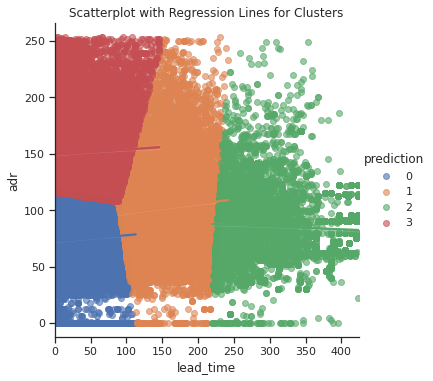

In [40]:
# Create a scatterplot with regression lines for each cluster
plt.figure(figsize=(10, 8))
sns.lmplot(x='lead_time', y='adr', data=pd_df, hue='prediction', scatter_kws={'alpha':0.6}, fit_reg=True)
plt.title('Scatterplot with Regression Lines for Clusters')
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.show()

### Here the most profitable clients are the ones that have the lowest 'lead_time' and highest 'adr', that is the ones in the red cluster.

# Association Rule Mining using FPGrowth algorithm

In [42]:
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, array
from pyspark.sql.functions import count, lit

selected_columns = ['booking_changes', 'lead_time', 'customer_type', 'is_repeated_guest', 'is_cancelled']

# Create a copy of the Spark DataFrame
spark_fpg = spark_df.alias("spark_fpg")

# Handle null values by filling with a default value (e.g., "N/A")
spark_fpg = spark_fpg.fillna("N/A", subset=selected_columns)

# Create the "combined_array" column by combining selected columns into an array
spark_fpg = spark_fpg.withColumn(
    "combined_array",
    array(*[col(col_name) for col_name in selected_columns])
)

# Check for duplicates in the combined_array column
duplicate_check = spark_fpg.groupBy("combined_array").agg(count("*").alias("count"))
duplicates = duplicate_check.filter(col("count") > lit(1))

# Show the duplicates
duplicates.show()

# If duplicates are found, you can remove them
if duplicates.count() > 0:
    spark_fpg = spark_fpg.dropDuplicates(["combined_array"])

# Check for duplicates again after removing
duplicates = spark_fpg.groupBy("combined_array").count().where(col("count") > 1)
duplicates.show()

# Errors from down here

# Perform Association Rule Mining using FPGrowth
# fp_growth = FPGrowth(itemsCol="combined_array", minSupport=0.1, minConfidence=0.5)
# model = fp_growth.fit(spark_fpg)

# Get frequent itemsets
# frequent_itemsets = model.freqItemsets
# frequent_itemsets.show()

# Get association rules
# association_rules = model.associationRules
# association_rules.show()

+--------------------+-----+
|      combined_array|count|
+--------------------+-----+
|[1, 73, Transient...|   10|
|[2, 68, Transient...|    2|
|[1, 224, Transien...|    3|
|[0, 234, Transien...|   15|
|[0, 346, Transien...|    8|
|[2, 386, Transien...|   21|
|[1, 106, Transien...|    5|
|[1, 237, Transien...|    2|
|[0, 411, Transien...|   24|
|[0, 120, Transien...|    7|
|[1, 39, Transient...|   41|
|[0, 7, Contract, ...|    9|
|[1, 119, Transien...|    2|
|[0, 298, Transien...|    8|
|[0, 43, Contract,...|    2|
|[0, 112, Transien...|  103|
|[0, 113, Transien...|  203|
|[0, 76, Transient...|  122|
|[1, 65, Transient...|    4|
|[1, 10, Transient...|   49|
+--------------------+-----+
only showing top 20 rows

+--------------+-----+
|combined_array|count|
+--------------+-----+
+--------------+-----+



In [43]:
spark.stop()